In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = np.load('data/landfill_clear_plastic.npz')
landfill = data['arr_0']
clear = data['arr_1']
plastic = data['arr_2']

In [3]:
plastic[np.isnan(plastic)] = 0

(148, 212, 224)


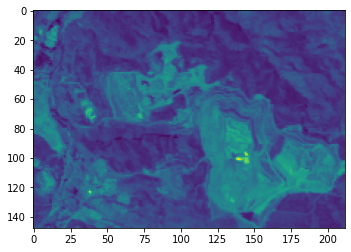

In [4]:
plt.imshow(landfill[:, :, 30])
print(landfill.shape)

(148, 212, 224)


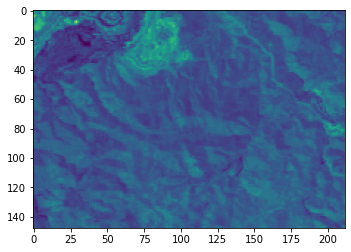

In [5]:
plt.imshow(clear[:, :, 30])
print(clear.shape)

In [6]:
def whitening_matrix(m):
    old_shape = m.shape
    m = m.reshape(-1, old_shape[-1])
    mean = np.mean(m)
    cov = np.cov(m - mean, rowvar=False)
    w, v = np.linalg.eig(cov)
    W = np.matmul(np.matmul(v, np.diag(1 / np.sqrt(1e-6 + w))), v.T)
    return W, mean

def whiten(m, W, mean):
    old_shape = m.shape

    m = m.reshape(-1, old_shape[-1])
    m = m - mean
    m = np.matmul(m, W)
    m = m.reshape(*old_shape)
    return m

In [7]:
W, mean = whitening_matrix(clear)

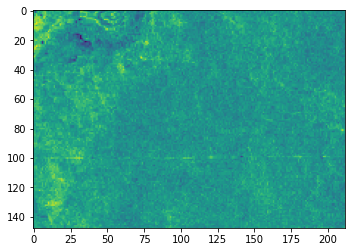

In [8]:
plt.imshow(whiten(clear, W, mean)[:, :, 30])

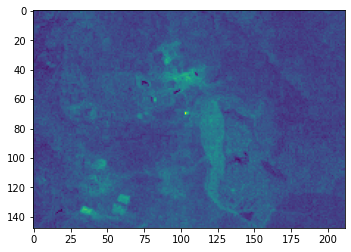

In [9]:
plt.imshow(whiten(landfill, W, mean)[:, :, 30])

In [10]:
landfill2 = whiten(landfill, W, mean)
clear2 = whiten(clear, W, mean)
plastic2 = whiten(plastic, W, mean)

In [11]:
def score(area, spectrum):
    old_shape = area.shape
    area = area.reshape(-1, old_shape[-1])
    area = np.matmul(area, spectrum)
    area = area.reshape(*old_shape[0:2])
    return area

19015.72574082503 36306.12377459171


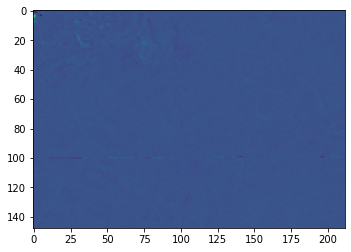

In [12]:
clear3 = score(clear2, plastic2)
plt.imshow(clear3)
print(clear3.min(), clear3.max())

-82116.77060417231 39520.967055776346


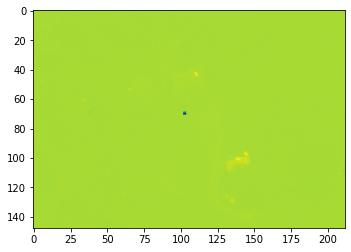

In [13]:
landfill3 = score(landfill2, plastic2)
plt.imshow(landfill3)
print(landfill3.min(), landfill3.max())

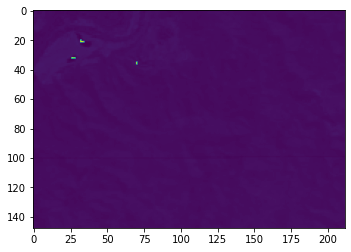

In [14]:
plt.imshow(score(clear, plastic))

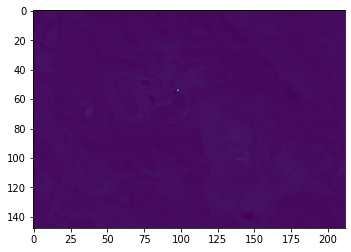

In [15]:
plt.imshow(score(landfill, plastic))